In [1]:
import numpy as np 
import pandas as df 
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

df=df.read_csv('wdbc_dataset.csv',delimiter=',',
            names=["ID","diagnosis","Radius","Texture","Perimeter","Area","Smoothness","Compactness",
                   "Concavity","Concavepoints","Symmetry","Fractal dimension",
                   "Radius_standarderror","Texture_standarderror","Perimeter_standarderror",
                   "Area_standarderror","Smoothness_standarderror","Compactness_standarderror",
                   "Concavity_standarderror","Concavepoints_standarerror",
                   "Symmetry_standarderror","Fractaldimension_standarderror",
                   "Radius_worst","Texture_worst","Perimeter_worst","Area_worst","Smoothness_worst",
                   "Compactness_worst","Concavity_worst","Concavepoints_worst","Symmetry_worst",
                   "fractaldimension_worst"])

In [2]:
def predict(w, b, X_t):
   
    X = X_t
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
       
    return Y_prediction

In [3]:
df.drop("ID",axis=1,inplace=True)

In [4]:
df['diagnosis']=df['diagnosis'].map({'M' : 1,'B': 0})

In [5]:
y = df.diagnosis.values 
x_data = df.drop(['diagnosis'], axis = 1) 

In [6]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [7]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42) 

In [8]:
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test, test_size=0.5, random_state=42)

In [9]:
x_train = x_train.T 
x_test = x_test.T 

y_train = np.asarray(y_train).T 
y_test = y_test.T

x_validation = x_validation.T
y_validation = y_validation.T

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
losstrack1 = []
losstrack = []
trainingAccuracyTrack = []
validationAccuracyTrack = []

def functionOfLogisticRegression(learningRate, epochs):
    w = np.zeros((x_train.shape[0],1))
    b=0
    for epoch in range(epochs):
        z=np.dot(w.T, x_train) + b
        p = sigmoid(z)
        
        cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/x_train.shape[1]
        
        z1=np.dot(w.T, x_validation) + b
        p2 = sigmoid(z1)

        cost1 = -np.sum(np.multiply(np.log(p2), y_validation) + np.multiply((1-y_validation),np.log(1-p2)))/x_validation.shape[1]

        losstrack1.append(np.squeeze(cost1))
        losstrack.append(np.squeeze(cost))
        
        dz=p-y_train
        dw = (1/x_train.shape[1])* np.dot(x_train, dz.T)
        db = (1/x_train.shape[1])* np.sum(dz)
        
        w = w - learningRate*dw
        b = b - learningRate*db
        
        trainingAccuracyTrack.append(100 - np.mean(np.abs(predict(w, b, x_train) - y_train)))
        validationAccuracyTrack.append(100 - np.mean(np.abs(predict(w, b, x_validation) - y_validation)))
        
    Y_prediction_validation = predict(w, b, x_validation)
    print('Validation accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_validation - y_validation)) * 100))
    
    Y_prediction_test = predict(w, b, x_test)
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    
    Y_prediction_train = predict(w, b, x_train)
    
    print('Training Accuracy accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    
    conf_matrix=confusion_matrix(y_test.T,Y_prediction_test.T)
    
    TP=conf_matrix[0][0]
    FN=conf_matrix[0][1]
    FP=conf_matrix[1][0]
    TN=conf_matrix[1][1]
 
    accuracy=(TP)/(TP+FP)
    
    print('Precision of Test set : {} %'.format(accuracy * 100))
    
    recall=(TP)/(TP+FN)
          
    print('recall for the Test set : {} %'.format(recall * 100))


In [14]:
functionOfLogisticRegression(0.24, 3700)

Validation accuracy: 98.24561403508773 %
test accuracy: 96.49122807017544 %
Training Accuracy accuracy: 97.8021978021978 %
Precision of Test set : 93.75 %
recall for the Test set : 100.0 %


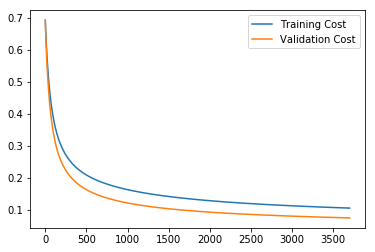

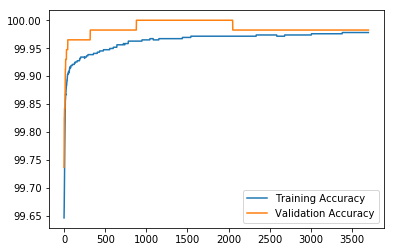

In [15]:
plt.plot(losstrack)
plt.plot(losstrack1)
plt.gca().legend(('Training Cost','Validation Cost'))
plt.show() 

plt.plot(trainingAccuracyTrack)
plt.plot(validationAccuracyTrack)
plt.gca().legend(('Training Accuracy','Validation Accuracy'))
plt.show() 
